DESCRIÇÃO DO DATASET:<br>
  
*   Nome do dataset:Índice Nacional de Preços ao Consumidor Amplo (IPCA) - Índice de difusão
*   Link original: https://dados.gov.br/dados/conjuntos-dados/21379-indice-nacional-de-precos-ao-consumidor-amplo-ipca-indice-de-difusao
*   Órgão responsável pela publicação: banco-central-do-brasil-bcb
*   Descrição do tema :<br>
O Índice Nacional de Preços ao Consumidor Amplo (IPCA) é o indicador oficial de inflação no Brasil, calculado mensalmente pelo Instituto Brasileiro de Geografia e Estatística (IBGE). O Índice de Difusão é uma métrica complementar do IPCA que mede a parcela de subitens com variação positiva no mês, ou seja, mostra a difusão da inflação entre os diversos componentes da cesta de consumo. Um índice mais alto indica que a inflação está mais disseminada, afetando um maior número de itens, enquanto um índice mais baixo sugere que a alta de preços é concentrada em poucos produtos ou serviços.

*   Finalidade:
O índice de difusão serve como ferramenta para análise econômica e tomada de decisão, permitindo que governos, bancos centrais, economistas e empresas avaliem não apenas a magnitude da inflação, mas também sua distribuição setorial. Isso ajuda a identificar quais setores estão pressionando os preços e a antecipar tendências de inflação futura, subsidiando políticas monetárias, planejamento econômico e estratégias de mercado.
*   Número de registros e colunas: Dimensão (311, 2)



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("IPCA.csv", encoding="ISO-8859-1", sep=";")

1.Explorar o dataset

In [28]:
df.head()

,data,valor
0,01/09/1999,"58,40"
1,01/10/1999,"66,41"
2,01/11/1999,"64,06"
3,01/12/1999,"67,77"
4,01/01/2000,"68,75"


In [29]:
print("5 primeiras linhas:")
df.head()

5 primeiras linhas:


,data,valor
0,01/09/1999,"58,40"
1,01/10/1999,"66,41"
2,01/11/1999,"64,06"
3,01/12/1999,"67,77"
4,01/01/2000,"68,75"


In [30]:
print("5 primeiras linhas:")
df.tail()

5 primeiras linhas:


,data,valor
306,01/03/2025,"64,72"
307,01/04/2025,"66,84"
308,01/05/2025,"59,68"
309,01/06/2025,"53,58"
310,01/07/2025,"49,60"


In [31]:
print("Dimensão (linhas, colunas):")
df.shape

Dimensão (linhas, colunas):


(311, 2)

In [32]:
print("Tipos de dados:")
df.info()

Tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    311 non-null    object
 1   valor   311 non-null    object
dtypes: object(2)
memory usage: 5.0+ KB


In [33]:
print("Lista de colunas:")
df.columns

Lista de colunas:


Index(['data', 'valor'], dtype='object')

In [34]:
print("Tipos de dados de cada coluna:")
df.dtypes

Tipos de dados de cada coluna:


,0
data,object
valor,object


In [37]:
# Converter 'data' para datetime
df['data'] = pd.to_datetime(df['data'], errors="coerce", dayfirst=True)

# Converter 'valor' para número, trocando vírgula por ponto
df['valor'] = df['valor'].str.replace(",", ".", regex=False)  # troca vírgula por ponto
df['valor'] = pd.to_numeric(df['valor'], errors="coerce")

print(df.dtypes)
print(df.head())


data     datetime64[ns]
valor           float64
dtype: object
        data  valor
0 1999-09-01  58.40
1 1999-10-01  66.41
2 1999-11-01  64.06
3 1999-12-01  67.77
4 2000-01-01  68.75


In [49]:
estatisticas = {
    "Média": df["valor"].mean(),
    "Mediana": df["valor"].median(),
    "Moda": df["valor"].mode()[0],
    "Mínimo": df["valor"].min(),
    "Máximo": df["valor"].max(),
    "Desvio padrão": df["valor"].std(),
    "Variância": df["valor"].var(),
    "Q1 (25%)": df["valor"].quantile(0.25),
    "Q2 (50% / Mediana)": df["valor"].quantile(0.50),
    "Q3 (75%)": df["valor"].quantile(0.75),
    "IQR": df["valor"].quantile(0.75) - df["valor"].quantile(0.25),
    "Valores ausentes": df.isna().sum().sum(),
    "Tipos de dados": df.dtypes.to_dict()
}

for chave, valor in estatisticas.items():
    print(f"{chave}: {valor}")


Média: 61.47012861736334
Mediana: 61.54
Moda: 60.94
Mínimo: 41.82
Máximo: 85.94
Desvio padrão: 7.262276101674503
Variância: 52.740654176952624
Q1 (25%): 56.77
Q2 (50% / Mediana): 61.54
Q3 (75%): 66.02
IQR: 9.249999999999993
Valores ausentes: 0
Tipos de dados: {'data': dtype('<M8[ns]'), 'valor': dtype('float64')}


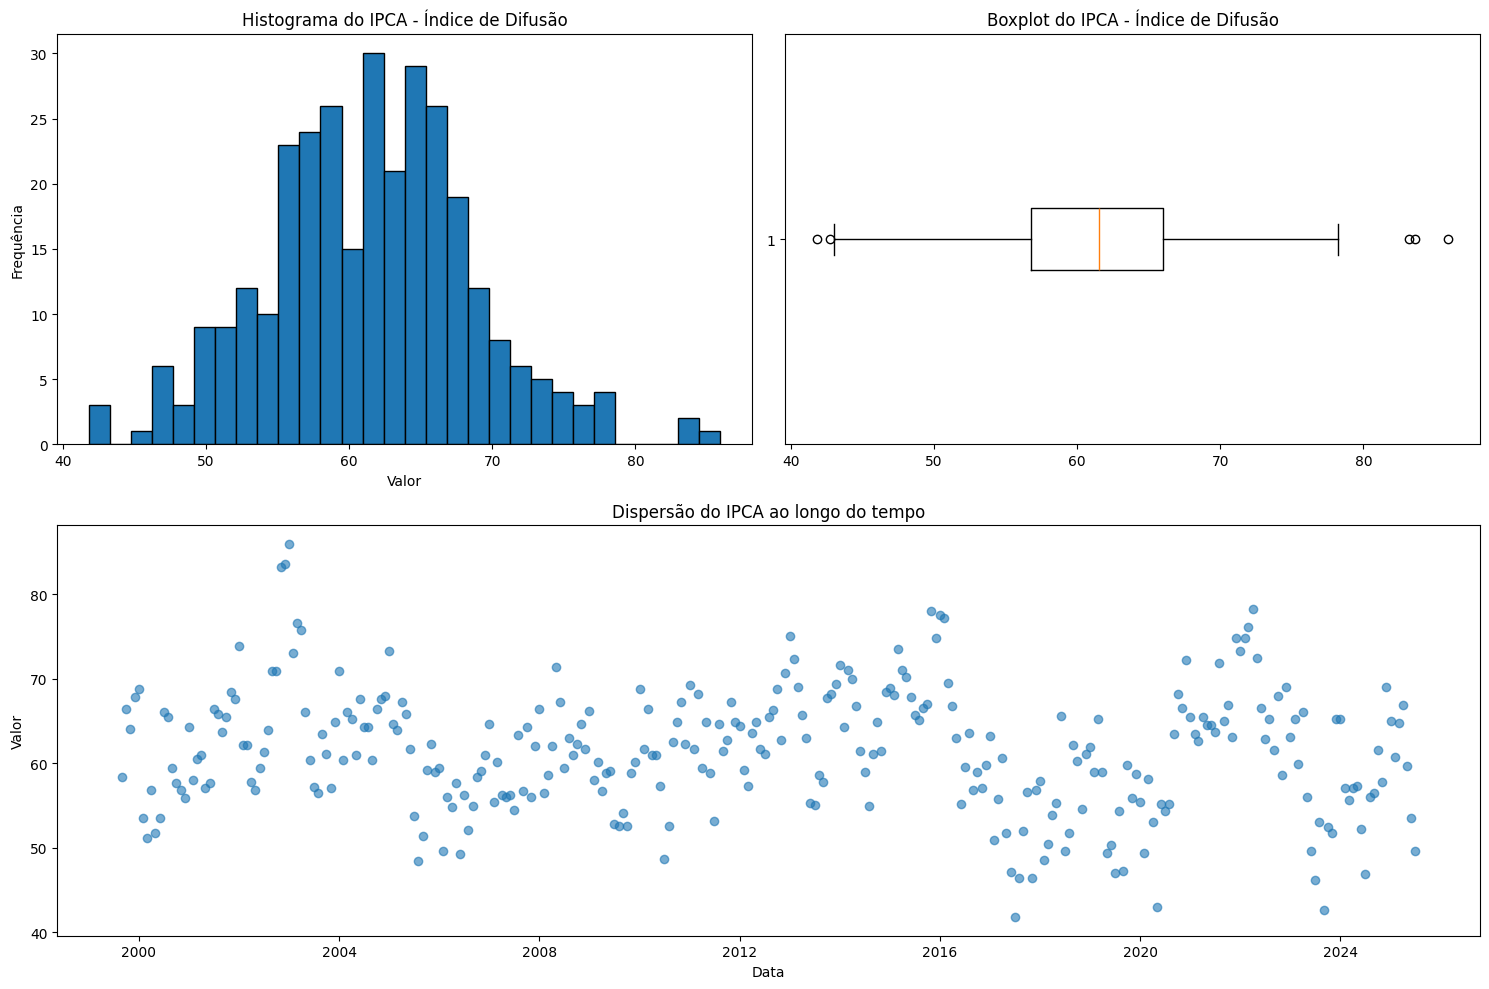

In [50]:
# === 3. Visualizações ===
plt.figure(figsize=(15, 10))

# Histograma
plt.subplot(2, 2, 1)
plt.hist(df["valor"].dropna(), bins=30, edgecolor="black")
plt.title("Histograma do IPCA - Índice de Difusão")
plt.xlabel("Valor")
plt.ylabel("Frequência")

# Boxplot
plt.subplot(2, 2, 2)
plt.boxplot(df["valor"].dropna(), vert=False)
plt.title("Boxplot do IPCA - Índice de Difusão")

# Gráfico de dispersão (data x valor)
plt.subplot(2, 1, 2)
plt.scatter(df["data"], df["valor"], alpha=0.6)
plt.title("Dispersão do IPCA ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Valor")

plt.tight_layout()
plt.show()